In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
msp_mandi = pd.read_csv('msp_mandi.csv', index_col = 'year')
msp_mandi.head()

,Unnamed: 0,commodity,Type,msprice,msp_filter
year,,,,,
2012,0,paddy-unhusked,Kharif Crops,1250.0,1
2012,1,rice(paddy-hus),Kharif Crops,1280.0,1
2012,2,jowar_hybrid,Kharif Crops,1500.0,1
2012,3,sorgum(jawar),Kharif Crops,1520.0,1
2012,4,bajri,Kharif Crops,1175.0,1


In [3]:
msp_mandi = msp_mandi.iloc[:, 1:-1]
msp_mandi.head()

,commodity,Type,msprice
year,,,
2012,paddy-unhusked,Kharif Crops,1250.0
2012,rice(paddy-hus),Kharif Crops,1280.0
2012,jowar_hybrid,Kharif Crops,1500.0
2012,sorgum(jawar),Kharif Crops,1520.0
2012,bajri,Kharif Crops,1175.0


In [4]:
monthly_data = pd.read_csv('monthly_data_cleaned.csv')
monthly_data.head()

,date,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price
0,2014-09-01,Kurdwadi,sorgum(jawar),2014,September,454,1353,2610,1981
1,2014-09-01,Satara,ladies finger,2014,September,128,2435,3261,2848
2,2014-09-01,Satara,potato,2014,September,2988,2175,2488,2331
3,2014-09-01,Satara,ginger (fresh),2014,September,199,3438,4813,4125
4,2014-09-01,Satara,ground nut pods (dry),2014,September,1,3000,4000,3500


In [5]:
monthly_data['cluster'] = monthly_data.Commodity + " at " + monthly_data.APMC

In [6]:
monthly_data.head()

,date,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,cluster
0,2014-09-01,Kurdwadi,sorgum(jawar),2014,September,454,1353,2610,1981,sorgum(jawar) at Kurdwadi
1,2014-09-01,Satara,ladies finger,2014,September,128,2435,3261,2848,ladies finger at Satara
2,2014-09-01,Satara,potato,2014,September,2988,2175,2488,2331,potato at Satara
3,2014-09-01,Satara,ginger (fresh),2014,September,199,3438,4813,4125,ginger (fresh) at Satara
4,2014-09-01,Satara,ground nut pods (dry),2014,September,1,3000,4000,3500,ground nut pods (dry) at Satara


In [7]:
relevant_data = monthly_data[["APMC","Commodity","modal_price","Year","cluster"]].groupby(["APMC","Commodity","Year",
            "cluster"],as_index=False).count().rename(columns={"modal_price":"Count"}).reset_index(drop=True)

In [8]:
relevant_data.head()

,APMC,Commodity,Year,cluster,Count
0,Aamgaon,paddy-unhusked,2014,paddy-unhusked at Aamgaon,4
1,Aamgaon,paddy-unhusked,2015,paddy-unhusked at Aamgaon,12
2,Aamgaon,paddy-unhusked,2016,paddy-unhusked at Aamgaon,11
3,Aarni,black gram,2015,black gram at Aarni,1
4,Aarni,black gram,2016,black gram at Aarni,2


I will take all the clusters that have at least a year's worth of data.

In [9]:
relevant_data = relevant_data[relevant_data['Count'] >= 12]
relevant_data.head()

,APMC,Commodity,Year,cluster,Count
1,Aamgaon,paddy-unhusked,2015,paddy-unhusked at Aamgaon,12
309,Akhadabalapur,soybean,2015,soybean at Akhadabalapur,12
367,Akluj,bitter gourd,2015,bitter gourd at Akluj,12
373,Akluj,brinjal,2015,brinjal at Akluj,12
377,Akluj,cabbage,2015,cabbage at Akluj,12


In [10]:
relevant_data.shape

(967, 5)

In [11]:
clusters = relevant_data["cluster"].unique().tolist()
relevant = monthly_data[monthly_data["cluster"].isin(clusters)].reset_index(drop=True)

In [12]:
relevant = relevant.set_index('date', drop = True)
relevant.index = pd.to_datetime(relevant.index)
relevant.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,cluster
date,,,,,,,,,
2014-09-01,Kurdwadi,sorgum(jawar),2014,September,454,1353,2610,1981,sorgum(jawar) at Kurdwadi
2014-09-01,Satara,ladies finger,2014,September,128,2435,3261,2848,ladies finger at Satara
2014-09-01,Satara,potato,2014,September,2988,2175,2488,2331,potato at Satara
2014-09-01,Satara,ginger (fresh),2014,September,199,3438,4813,4125,ginger (fresh) at Satara
2014-09-01,Satara,bottle gourd,2014,September,100,879,1954,1192,bottle gourd at Satara


Trying to find the variation coefficient in all clusters in `relevant`.

In [13]:
fluctuation_list = []
clusters = relevant_data.cluster.unique().tolist()
from scipy import stats

In [14]:
for cluster in clusters:
    working_df = relevant[relevant['cluster'] == cluster]
    variation = stats.variation(working_df.modal_price)
    fluctuation_list.append((cluster, variation))

In [15]:
fluctuation_list

[('paddy-unhusked at Aamgaon', 0.06724464589991677),
 ('soybean at Akhadabalapur', 0.07686973402265941),
 ('bitter gourd at Akluj', 0.32749576530005003),
 ('brinjal at Akluj', 0.33268288172527316),
 ('cabbage at Akluj', 0.3855111503510684),
 ('chikoo at Akluj', 0.23767500696929325),
 ('chillies(red) at Akluj', 0.521695950509048),
 ('garlic at Akluj', 0.45411812081649194),
 ('ladies finger at Akluj', 0.3301800044731694),
 ('maize at Akluj', 0.10945801859132055),
 ('onion at Akluj', 0.6677884765479271),
 ('potato at Akluj', 0.26969218966756525),
 ('shevga at Akluj', 0.35960888295556415),
 ('tomato at Akluj', 0.5971499454913504),
 ('water melon at Akluj', 0.36812238199284075),
 ('bajri at Akole', 0.0619082909876151),
 ('gram at Akole', 0.27431084101584674),
 ('onion at Akole', 0.7169866586418784),
 ('paddy-unhusked at Akole', 0.0658357603503994),
 ('soybean at Akole', 0.09057803602117291),
 ('wheat(husked) at Akole', 0.0566369864452871),
 ('rice(paddy-hus) at Alibag', 0.34657008089215324)

In [16]:
variation_data = pd.DataFrame(fluctuation_list)

In [17]:
variation_data.columns = ['cluster', 'var_coeff']

In [18]:
variation_data.head()

,cluster,var_coeff
0,paddy-unhusked at Aamgaon,0.067245
1,soybean at Akhadabalapur,0.076870
2,bitter gourd at Akluj,0.327496
3,brinjal at Akluj,0.332683
4,cabbage at Akluj,0.385511


I need the first few clusters which have maximum variation coefficient.

In [19]:
variation_data = variation_data.sort_values(by = 'var_coeff', ascending = False)

In [20]:
variation_data.head()

,cluster,var_coeff
682,other vegetables at Pune-Manjri,2.150666
673,curry leaves at Pune-Manjri,2.124294
680,mint at Pune-Manjri,2.100028
79,brinjal at Barshi,1.562366
96,tomato at Barshi,1.536466


In [21]:
variation_data = variation_data.reset_index(drop = True)

In [22]:
variation_data.head()

,cluster,var_coeff
0,other vegetables at Pune-Manjri,2.150666
1,curry leaves at Pune-Manjri,2.124294
2,mint at Pune-Manjri,2.100028
3,brinjal at Barshi,1.562366
4,tomato at Barshi,1.536466


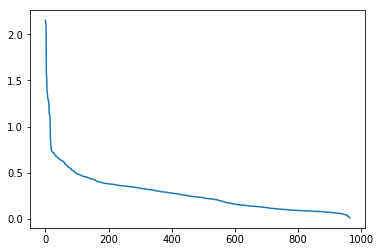

In [23]:
figure = plt.plot(variation_data.var_coeff)

The key idea here is to select the clusters that have the highest variability. These are the ones that lie to the left of the elbow. It is difficult to pinpoint the location of the elbow, so I'll zoom in a little.

In [24]:
fluctuation_clusters = variation_data.iloc[0:100, :]

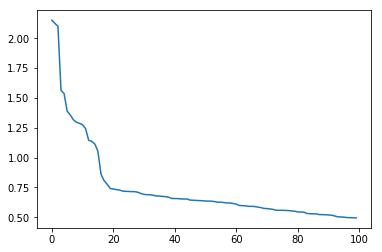

In [25]:
plt.plot(fluctuation_clusters.var_coeff)

From the zoomed-in plot, it is evident that clusters with indices less than 20 have a higher variability compared to the rest of the clusters, i.e. these clusters have data values that are more separated than the rest.

In [26]:
fluctuation_clusters = fluctuation_clusters.iloc[0:20, :]

In case of normal distribution, 3 standard deviations from the mean/median on both sides encompass ~99.7% of the data. So, using this intuition, if a price point lies beyond 3 standard deviations, it has a price fluctuation.

In [27]:
cluster_list = fluctuation_clusters.cluster.tolist()

In [28]:
cluster_list

['other vegetables at Pune-Manjri',
 'curry leaves at Pune-Manjri',
 'mint at Pune-Manjri',
 'brinjal at Barshi',
 'tomato at Barshi',
 'cabbage at Barshi',
 'flower at Barshi',
 'green chilli at Barshi',
 'cluster bean at Barshi',
 'ambat chuka at Pune-Manjri',
 'lemon at Barshi',
 'cucumber at Barshi',
 'capsicum at Barshi',
 'ladies finger at Barshi',
 'bitter gourd at Barshi',
 'ghosali(bhaji) at Pune-Manjri',
 'onion at Pune-Manjri',
 'squash gourd at Pune',
 'onion at Lasur Station',
 'rajgira at Pune-Manjri']

In [29]:
fluctuation_df = pd.DataFrame()
for cluster in cluster_list:
    span = relevant.modal_price[relevant.cluster == cluster].std()*3
    working_df = relevant[(relevant.cluster == cluster) & (relevant.modal_price > span)]
    fluctuation_df = pd.concat([fluctuation_df, working_df])

In [30]:
fluctuation_df

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,cluster
date,,,,,,,,,
2016-10-01,Barshi,brinjal,2016,October,91,2416,4163,3574,brinjal at Barshi
2016-07-01,Barshi,tomato,2016,July,147,1467,2445,1924,tomato at Barshi
2016-07-01,Barshi,cabbage,2016,July,124,872,1486,1168,cabbage at Barshi
2016-07-01,Barshi,flower,2016,July,106,1019,1641,1332,flower at Barshi
2016-07-01,Barshi,green chilli,2016,July,138,3055,5190,3990,green chilli at Barshi
2016-10-01,Barshi,cluster bean,2016,October,57,3095,4821,4021,cluster bean at Barshi
2015-06-01,Pune-Manjri,ambat chuka,2015,June,4,900,1800,1350,ambat chuka at Pune-Manjri
2016-09-01,Barshi,lemon,2016,September,188,2911,4647,3858,lemon at Barshi
2016-10-01,Barshi,cucumber,2016,October,151,768,1590,1213,cucumber at Barshi


In [31]:
fluctuation_df.cluster.unique().tolist()

['brinjal at Barshi',
 'tomato at Barshi',
 'cabbage at Barshi',
 'flower at Barshi',
 'green chilli at Barshi',
 'cluster bean at Barshi',
 'ambat chuka at Pune-Manjri',
 'lemon at Barshi',
 'cucumber at Barshi',
 'capsicum at Barshi',
 'ladies finger at Barshi',
 'bitter gourd at Barshi',
 'ghosali(bhaji) at Pune-Manjri',
 'onion at Pune-Manjri',
 'squash gourd at Pune',
 'onion at Lasur Station',
 'rajgira at Pune-Manjri']

All these sets of APMCs and commodities have some of the highest price fluctuations.

In [32]:
fluctuation_df.to_csv('price_fluctuation_values.csv')

In [33]:
pd.DataFrame(fluctuation_df.cluster.unique().tolist()).to_csv('fluctuation_clusters.csv')